In [ ]:
# https://pythonprogramming.net/train-test-tensorflow-deep-learning-tutorial

import tensorflow as tf
import numpy as np
import datasets

train_x, test_x, train_y, test_y = datasets.mnist()

In [26]:
import numpy as np
import theano
from theano import tensor as T
from softmax import softmax

epochs = 1
X = trX
Y = trY

N, D = X.shape
N, C = Y.shape
H = 625

floatX = lambda X: np.asarray(X, dtype = theano.config.floatX)
weights = lambda n, d: theano.shared(floatX(np.random.randn(n, d) * 0.01))

XX = T.fmatrix()
YY = T.fmatrix()

w_h = weights(D, H)
w_o = weights(H, C)

h = T.nnet.sigmoid(T.dot(XX, w_h))
py_x = T.nnet.softmax(T.dot(h, w_o))
y_x = T.argmax(py_x, axis=1)

cost = T.mean(T.nnet.categorical_crossentropy(py_x, YY))
params = [w_h, w_o]
grads = T.grad(cost, params)
learning_rate = 0.05
updates = [[p, p - g * learning_rate] for p, g in zip(params, grads)]

train = theano.function([XX, YY], updates = updates, allow_input_downcast = True)
predict = theano.function([XX], y_x, allow_input_downcast = True)

for _ in range(epochs):
    for start, end in zip(range(0, N, 128), range(128, N, 128)):
        train(X[start : end], Y[start : end])
        
print np.mean(np.argmax(teY, axis = 1) == predict(teX))

0.7039


In [146]:
N, D = train_x.shape
N, C = train_y.shape
epochs = 1

x = tf.placeholder('float')
y = tf.placeholder('float')

l1_nodes = 1500
w = tf.Variable(tf.random_normal([D, l1_nodes]))
b = tf.Variable(tf.random_normal([l1_nodes]))
l = tf.nn.relu(tf.add(tf.matmul(x, w), b))

l2_nodes = 1500
w = tf.Variable(tf.random_normal([l1_nodes, l2_nodes]))
b = tf.Variable(tf.random_normal([l2_nodes]))
l = tf.nn.relu(tf.add(tf.matmul(l, w), b))

l3_nodes = 1500
w = tf.Variable(tf.random_normal([l2_nodes, l3_nodes]))
b = tf.Variable(tf.random_normal([l3_nodes]))
l = tf.nn.relu(tf.add(tf.matmul(l, w), b))

w = tf.Variable(tf.random_normal([l3_nodes, C]))
b = tf.Variable(tf.random_normal([C]))
model = tf.matmul(l, w) + b

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(model, y))
optimizer = tf.train.AdamOptimizer(learning_rate = 0.001).minimize(cost)

with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())

    for _ in range(epochs):
        start = 0
        while start < N:
            end = start + 100
            feed_dict = {x: train_x[start : end], y: train_y[start : end]}
            sess.run(optimizer, feed_dict = feed_dict)
            start = end

    correct = tf.equal(tf.argmax(model, 1), tf.argmax(y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct, 'float'))

    print('Accuracy:', accuracy.eval({x: test_x, y: test_y}))

('Accuracy:', 0.91610003)


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import classify
import mcc
import datasets

In [94]:
X, y = datasets.htwt()

In [2]:
trX, teX, trY, teY = datasets.mnist()

In [81]:
N = 20000
X, Y = trX[:N], trY[:N]

In [6]:
reload(nnet)
clf = nnet.Classifier()
clf.fit(X, Y)
np.mean(clf.predict(X) == np.argmax(Y, axis = 1))

TypeError: an integer is required

In [4]:
import nb
import lda
import qda
import rda
import flda
import nsc
import irls
# import logistic
import knn
import nnet
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
# from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis 
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.neighbors import NearestCentroid
import statsmodels.api as sm

In [14]:
clf = BernoulliNB()
clf = nb.bernoulli()
clf = GaussianNB()
clf = nb.gaussian()
clf = NearestCentroid()
clf = nsc.Classifier()
# clf = LinearDiscriminantAnalysis()
clf = lda.Classifier()
clf = qda.Classifier()
clf = rda.Classifier()
clf = flda.Classifier()
# clf = QuadraticDiscriminantAnalysis()
clf = irls.Classifier()
clf = LogisticRegression()
# clf = logistic.Classifier()
clf = knn.Classifier()

In [97]:
fit = sm.Logit(y, sm.add_constant(X)).fit_regularized(disp = 0)
p = fit.predict(sm.add_constant(X))
yhat = (p > 0.5) * 1
print '%0.3f' % np.mean(np.mean(yhat != y))

0.119


In [17]:
clf = knn.Classifier()

clf.fit(X, y)
print '%0.3f' % np.mean(np.mean(clf.predict(X) != y))

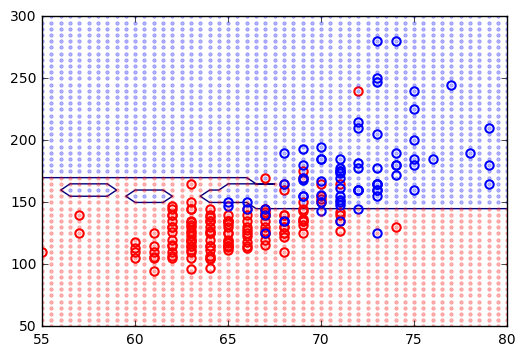

In [9]:
classify.show_points(X, y)
classify.show_regions(clf, X)
# classify.show_contour(clf, X)
plt.show()